# Ames Housing Project Part 2 - Preprocessing and Modeling

---

_Author: Matthew Hill_

### Importing Data
---

In [205]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn import metrics
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso, LassoCV
import pickle

### _Subsets for Model_
---

In [206]:
df_train = pd.read_csv('../datasets/trainsubset.csv')
df_test = pd.read_csv('../datasets/testsubset.csv')

In [207]:
df_test.head(3)

,Unnamed: 0,Id,Overall Qual,Gr Liv Area,Garage Area,Garage Cars,Total Bsmt SF,1st Flr SF,Year Built,Year Remod/Add,...,Bedroom AbvGr,Screen Porch,3Ssn Porch,Mo Sold,Pool Area,BsmtFin SF 2,Kitchen Qual,Exter Cond,Exter Qual,SalePrice
0,0,2658,6,1928,440,1,1020,908,1910,1950,...,4,0,0,4,0,0,3,3,1,181469.701609
1,1,2718,5,1967,580,2,1967,1967,1977,1977,...,6,0,0,8,0,0,1,1,1,181469.701609
2,2,2414,7,1496,426,2,654,664,2006,2006,...,3,0,0,9,0,0,2,1,2,181469.701609


In [208]:
df_train.head(3)

,Unnamed: 0,Id,Overall Qual,Gr Liv Area,Garage Area,Garage Cars,Total Bsmt SF,1st Flr SF,Year Built,Year Remod/Add,...,Bedroom AbvGr,Screen Porch,3Ssn Porch,Mo Sold,Pool Area,BsmtFin SF 2,Kitchen Qual,Exter Cond,Exter Qual,SalePrice
0,0,109,6.0,1479.0,475.0,2.0,725.0,725.0,1976.0,2005.0,...,3,0,0,3,0,0.0,2,1,2,130500
1,1,544,7.0,2122.0,559.0,2.0,913.0,913.0,1996.0,1997.0,...,4,0,0,4,0,0.0,2,1,2,220000
2,2,153,5.0,1057.0,246.0,1.0,1057.0,1057.0,1953.0,2007.0,...,3,0,0,1,0,0.0,2,2,1,109000


##### Drop 'Unnamed: 0' columns
---

In [209]:
df_train.drop(columns=['Unnamed: 0'], inplace = True)

In [210]:
df_train.head(3)

,Id,Overall Qual,Gr Liv Area,Garage Area,Garage Cars,Total Bsmt SF,1st Flr SF,Year Built,Year Remod/Add,Full Bath,...,Bedroom AbvGr,Screen Porch,3Ssn Porch,Mo Sold,Pool Area,BsmtFin SF 2,Kitchen Qual,Exter Cond,Exter Qual,SalePrice
0,109,6.0,1479.0,475.0,2.0,725.0,725.0,1976.0,2005.0,2.0,...,3,0,0,3,0,0.0,2,1,2,130500
1,544,7.0,2122.0,559.0,2.0,913.0,913.0,1996.0,1997.0,2.0,...,4,0,0,4,0,0.0,2,1,2,220000
2,153,5.0,1057.0,246.0,1.0,1057.0,1057.0,1953.0,2007.0,1.0,...,3,0,0,1,0,0.0,2,2,1,109000


In [211]:
df_test.drop(columns=['Unnamed: 0'], inplace = True)

In [212]:
df_test.head(3)

,Id,Overall Qual,Gr Liv Area,Garage Area,Garage Cars,Total Bsmt SF,1st Flr SF,Year Built,Year Remod/Add,Full Bath,...,Bedroom AbvGr,Screen Porch,3Ssn Porch,Mo Sold,Pool Area,BsmtFin SF 2,Kitchen Qual,Exter Cond,Exter Qual,SalePrice
0,2658,6,1928,440,1,1020,908,1910,1950,2,...,4,0,0,4,0,0,3,3,1,181469.701609
1,2718,5,1967,580,2,1967,1967,1977,1977,2,...,6,0,0,8,0,0,1,1,1,181469.701609
2,2414,7,1496,426,2,654,664,2006,2006,2,...,3,0,0,9,0,0,2,1,2,181469.701609


## Preprocessing and Modeling
---

### OLS Train/Test Split Model

In [217]:
X = df_train[['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Garage Cars', 'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Year Remod/Add',  'Full Bath', 'Garage Yr Blt', 'TotRms AbvGrd', 'Fireplaces', 'BsmtFin SF 1', 'Mas Vnr Area', 'Lot Frontage', 'Wood Deck SF', 'Lot Area', 'Bsmt Full Bath', 'Half Bath', '2nd Flr SF',  'Kitchen AbvGr', 'Enclosed Porch', 'Bsmt Unf SF', 'Bedroom AbvGr', 'Screen Porch', '3Ssn Porch', 'Mo Sold', 'Pool Area', 'BsmtFin SF 2', 'Kitchen Qual', 'Exter Cond', 'Exter Qual']]
y = df_train['SalePrice']

In [218]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2022)

In [221]:
si = SimpleImputer()
X_train_imp = si.fit_transform(X_train)
X_test_imp = si.transform(X_test)
X_serving_imp = df_train[['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Garage Cars', 'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Year Remod/Add',  'Full Bath', 'Garage Yr Blt', 'TotRms AbvGrd', 'Fireplaces', 'BsmtFin SF 1', 'Mas Vnr Area', 'Lot Frontage', 'Wood Deck SF', 'Lot Area', 'Bsmt Full Bath', 'Half Bath', '2nd Flr SF', 'Kitchen AbvGr', 'Enclosed Porch', 'Bsmt Unf SF', 'Bedroom AbvGr', 'Screen Porch', '3Ssn Porch', 'Mo Sold', 'Pool Area', 'BsmtFin SF 2', 'Kitchen Qual', 'Exter Cond', 'Exter Qual']]

#### _Scaling_

In [222]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train_imp)
X_test_sc = sc.transform(X_test_imp)
X_serving_sc = sc.transform(X_serving_imp)

/Users/dimarhill/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


#### _Instantiate_

In [171]:
trainlr = LinearRegression()

In [172]:
trainlr.fit(X_train_imp, y_train)

LinearRegression()

### Evaluating

In [173]:
trainlr.score(X_train_imp, y_train)

0.9008998700514652

In [174]:
trainlr.score(X_test_imp, y_test)

0.8607768340344762

In [175]:
cross_val_score(trainlr, X_train_imp, y_train).mean()

0.8446465025706736

In [176]:
print(trainlr.intercept_)
print(trainlr.coef_)

-935107.573739249
[ 1.22182722e+04  3.02498052e+01  2.36364207e+01  1.15852778e+03
  8.12949881e+01  2.28725958e+01  2.27419406e+02  2.27888322e+02
 -3.25713781e+03 -8.45454733e+00  3.17120043e+03  3.67438839e+03
 -4.02516787e+01  3.21883517e+01  1.81136513e+02  8.01483487e+00
  5.71288804e-01  5.95001520e+02  1.94150373e+02  1.81653841e+01
 -1.59733150e+04  5.95772612e+00 -6.30934064e+01 -5.94861542e+03
  4.78175811e+01  1.54665739e+01  1.59001484e+02 -1.01764165e+01
 -5.62662307e+01  8.26986678e+03 -1.64374374e+03  1.17697080e+04]


In [177]:
r2_train = trainlr.score(X_train_imp, y_train)
r2_test = trainlr.score(X_test_imp, y_test)

print(f"Training R2 = {r2_train}")
print(f"Testing R2 = {r2_test}")

Training R2 = 0.9008998700514652
Testing R2 = 0.8607768340344762


### Predictions
---

In [224]:
predict = trainlr.predict(df_test[['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Garage Cars', 'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Year Remod/Add',  'Full Bath', 'Garage Yr Blt', 'TotRms AbvGrd', 'Fireplaces', 'BsmtFin SF 1', 'Mas Vnr Area', 'Lot Frontage', 'Wood Deck SF', 'Lot Area', 'Bsmt Full Bath', 'Half Bath', '2nd Flr SF', 'Kitchen AbvGr', 'Enclosed Porch',  'Bsmt Unf SF', 'Bedroom AbvGr', 'Screen Porch', '3Ssn Porch', 'Mo Sold', 'Pool Area', 'BsmtFin SF 2', 'Kitchen Qual', 'Exter Cond', 'Exter Qual']])
predict.shape

/Users/dimarhill/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


(878,)

In [225]:
y_pred = trainlr.predict(X_train_imp)
resids = y_train - y_pred

In [226]:
sse = np.sum((y_train - y_pred)**2)
mse = metrics.mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)

print(f"SSE = {sse}")
print(f"MSE = {mse}")
print(f"RMSE = {rmse}")

SSE = 940627035501.4291
MSE = 611591050.3910462
RMSE = 24730.366968386177


### Ridge Model
---

In [227]:
# Instantiate.
ridge_model = Ridge(alpha=2022)

# Fit.
ridge_model.fit(X_train_imp, y_train)

# Evaluate model using R2.
print(ridge_model.score(X_train_imp, y_train))
print(ridge_model.score(X_test_imp, y_test))

0.8782345303405373
0.8346202617025298


In [228]:

alphas = np.logspace(1, 5, 100)

# Cross-validate over our list of ridge alphas.
ridge_cv = RidgeCV(alphas=alphas, scoring='r2', cv=5)

# Fit model using best ridge alpha!
ridge_cv.fit(X_train_imp, y_train)

RidgeCV(alphas=array([1.00000000e+01, 1.09749877e+01, 1.20450354e+01, 1.32194115e+01,
       1.45082878e+01, 1.59228279e+01, 1.74752840e+01, 1.91791026e+01,
       2.10490414e+01, 2.31012970e+01, 2.53536449e+01, 2.78255940e+01,
       3.05385551e+01, 3.35160265e+01, 3.67837977e+01, 4.03701726e+01,
       4.43062146e+01, 4.86260158e+01, 5.33669923e+01, 5.85702082e+01,
       6.42807312e+01, 7.05480231e+0...
       1.17681195e+04, 1.29154967e+04, 1.41747416e+04, 1.55567614e+04,
       1.70735265e+04, 1.87381742e+04, 2.05651231e+04, 2.25701972e+04,
       2.47707636e+04, 2.71858824e+04, 2.98364724e+04, 3.27454916e+04,
       3.59381366e+04, 3.94420606e+04, 4.32876128e+04, 4.75081016e+04,
       5.21400829e+04, 5.72236766e+04, 6.28029144e+04, 6.89261210e+04,
       7.56463328e+04, 8.30217568e+04, 9.11162756e+04, 1.00000000e+05]),
        cv=5, scoring='r2')

In [229]:
ridge_cv.alpha_

657.9332246575682

In [230]:
print(ridge_cv.score(X_train_imp, y_train))
print(ridge_cv.score(X_test_imp, y_test))

0.8931264490209218
0.8505174382444999


In [231]:
ridge_cv.coef_

array([ 9.25947753e+03,  3.80564453e+01,  3.10532443e+01,  2.52551998e+02,
        5.59479664e+01,  2.01854502e+01,  2.77324542e+02,  3.49977062e+02,
       -1.26836162e+03,  6.93501357e+00,  5.58058274e+02,  2.32553103e+03,
       -8.74623294e+00,  4.07749315e+01,  1.86093979e+02,  1.14882105e+01,
        5.43175953e-01,  1.59023045e+01,  2.94381356e+02,  1.77078861e+01,
       -1.56395332e+03,  1.48053842e+01, -3.17757361e+01, -4.04027686e+03,
        5.53510146e+01,  2.22081862e+01,  1.50499492e+02,  1.83587999e+00,
       -2.73806129e+01,  6.36673957e+03, -4.23858642e+02,  6.07529109e+03])

### LASSO
---

In [232]:
# Set up a list of Lasso alphas to check.
l_alphas = np.logspace(1, 5, 100)

# Cross-validate over our list of Lasso alphas.
lasso_cv = LassoCV(n_alphas=100, cv=5, random_state=2022, max_iter=50000)

# Fit model using best ridge alpha!
lasso_cv.fit(X_train_imp, y_train);

In [233]:
lasso_cv.alpha_

146425.7254760417

In [234]:
print(lasso_cv.score(X_train_imp, y_train))
print(lasso_cv.score(X_test_imp, y_test))

0.8250861981036434
0.7823153815253158


In [235]:
lasso_cv.coef_

array([  0.        ,  68.65099072,  57.65488752,   0.        ,
        42.10546524,   0.56931561, 306.24598211, 256.12854657,
         0.        ,   0.        ,  -0.        ,   0.        ,
        23.75887357,  55.92753045,   0.        ,  11.44021635,
         0.39828419,   0.        ,   0.        ,   0.        ,
        -0.        ,  -0.        ,   0.        ,  -0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
        -0.        ,   0.        ,  -0.        ,   0.        ])

### _Comparison_

In [236]:
print(" OLS ".center(18, "="))
print(trainlr.score(X_train_imp, y_train))
print(trainlr.score(X_test_imp, y_test))
print()
print(" Ridge ".center(18, "="))
print(ridge_cv.score(X_train_imp, y_train))
print(ridge_cv.score(X_test_imp, y_test))
print()
print(" Lasso ".center(18, "="))
print(lasso_cv.score(X_train_imp, y_train))
print(lasso_cv.score(X_test_imp, y_test))

====== OLS =======
0.9008998700514652
0.8607768340344762

===== Ridge ======
0.8931264490209218
0.8505174382444999

===== Lasso ======
0.8250861981036434
0.7823153815253158


- _Looks like the OLS model performed the best._

### LINE Assumptions
---

### _I for Independence is assummed for this._

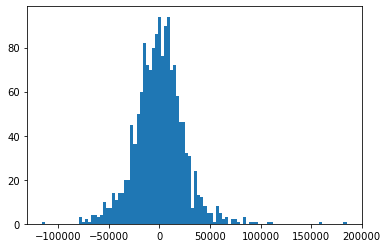

In [237]:
#N for Normality of errors
plt.hist(resids, bins=100);

In [238]:
resids.sort_values()

960    -115992.894597
1192    -79684.832717
1965    -77942.303051
378     -77421.896281
9       -76289.368911
            ...      
1164     96504.453490
1592    107767.071988
1503    112134.488778
1671    160432.856511
1796    185018.961520
Name: SalePrice, Length: 1538, dtype: float64

- _Looks fine to me._

### L for Linearity
### E for equal variances

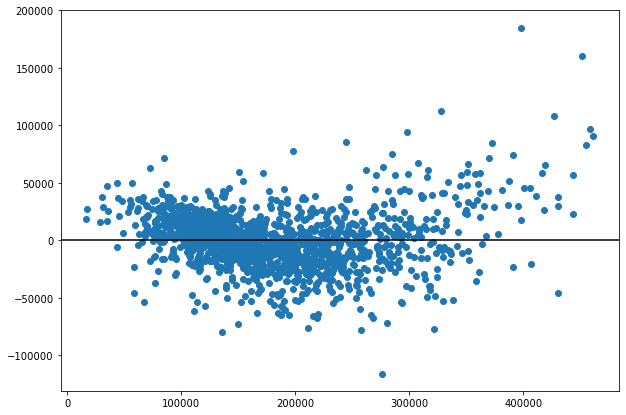

In [239]:
plt.figure(figsize=(10, 7))
plt.scatter(y_pred, resids)


plt.axhline(0, color='black');

- _Not 100% linear or equal variance but good enough in my opinion._

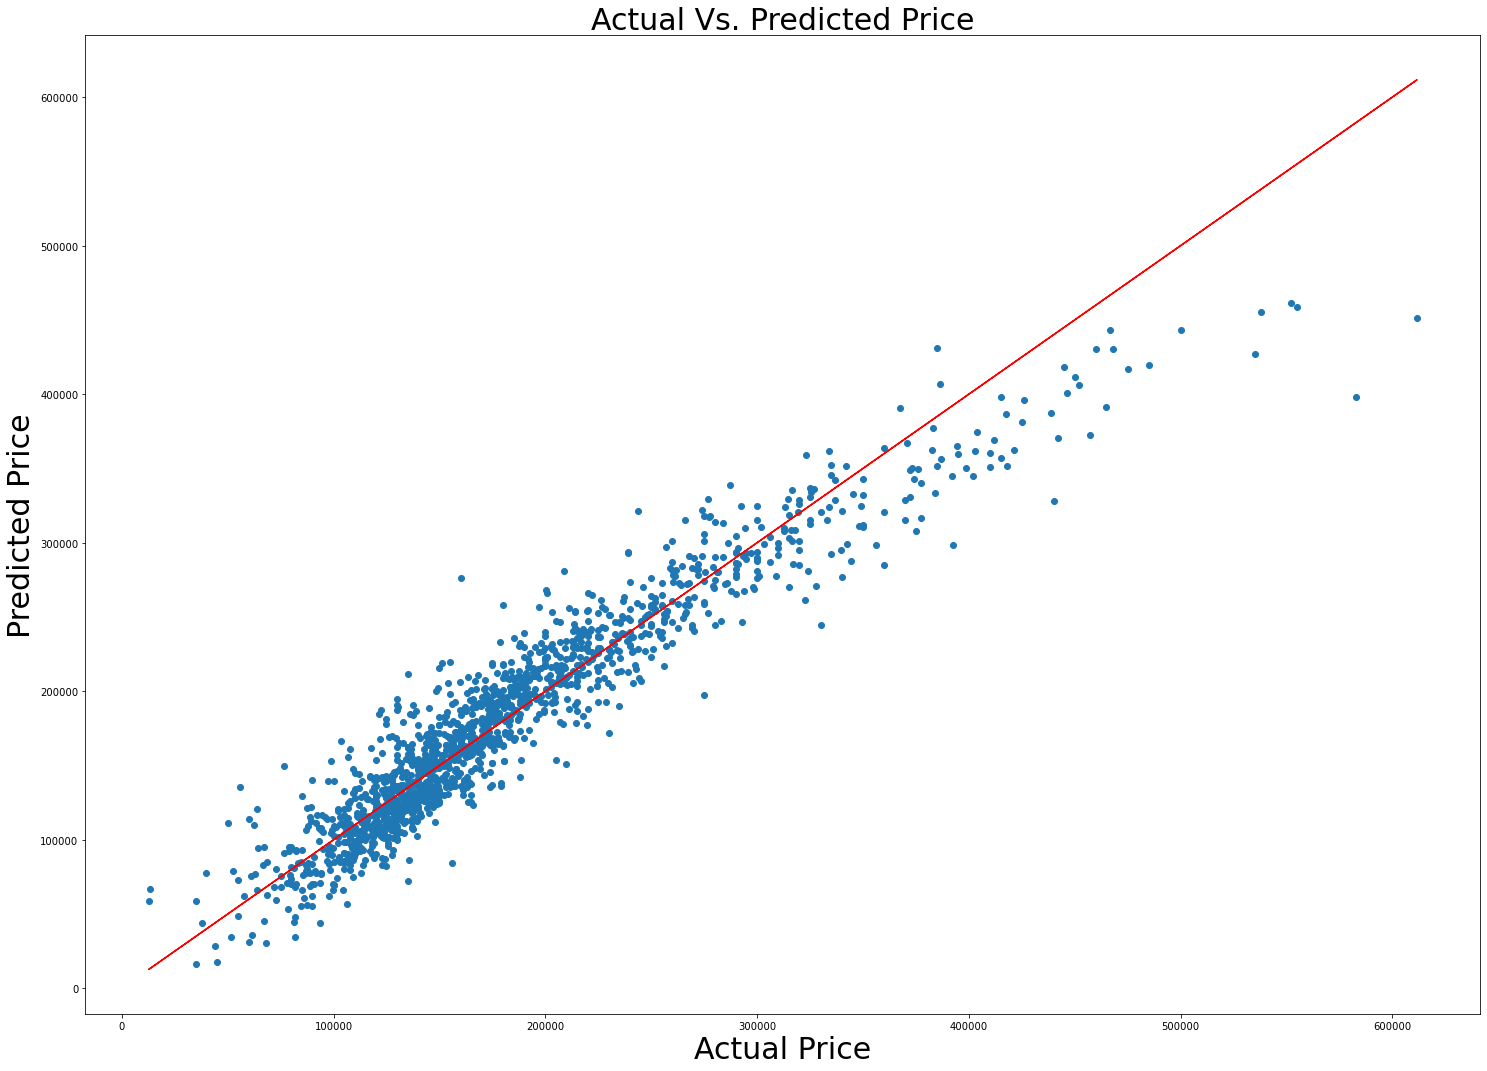

In [200]:
plt.figure(figsize = (25,18))
plt.scatter(y_train, y_pred)
plt.plot(y,y, color='red')
plt.title('Actual Vs. Predicted Price', size = 30);
plt.xlabel('Actual Price', size = 30)
plt.ylabel('Predicted Price', size = 30);

### Submission Dataframe

In [195]:
df_test['SalePrice'] = predict

In [196]:
lr_submission = df_test[['Id', 'SalePrice']]

In [197]:
lr_submission.set_index('Id', inplace=True)

In [198]:
lr_submission.head(3)

,SalePrice
Id,
2658,145507.892491
2718,162439.854360
2414,206580.495668


In [199]:
lr_submission.to_csv('../datasets/intgerlr6_submission.csv') 